In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"]=15,10

## Cargamos los datos informados por el Ministerios de Ciencia

In [7]:
url  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales.csv"
data = pd.read_csv(url)
data = data.rename(columns={"Fecha": "Item"}) #Le cambiamos el nombre a la columna

In [8]:
data.head()

,Item,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27
0,Casos nuevos,0,2,1,1,2,3,5,2,6,...,478,358,419,325,464,516,494,552,473,482
1,Casos totales,1,3,4,5,7,10,15,17,23,...,9730,10088,10507,10832,11296,11812,12306,12858,13331,13813
2,Casos recuperados,0,0,0,0,0,0,0,0,0,...,4035,4338,4676,4969,5386,5804,6327,6746,7024,7327
3,Fallecidos,0,0,0,0,0,0,0,0,0,...,126,133,139,147,160,168,174,181,189,198
4,Casos activos,1,3,4,5,7,10,15,17,23,...,5569,5617,5692,5716,5750,5840,5805,5931,6118,6288


In [9]:
def Graph(name_item):
    data_by_item = data[(data.Item == name_item)].values
    Y            = np.delete(data_by_item, 0)
    X            = data.columns[1:]
    
    plt.plot(X, Y, 'b')
    plt.plot(X, Y, 'bo')
    plt.xlabel('Fecha')
    plt.ylabel(name_item)
    plt.title(name_item)
    plt.grid()
    plt.xticks(X, rotation='vertical')
    plt.show()

## Casos totales

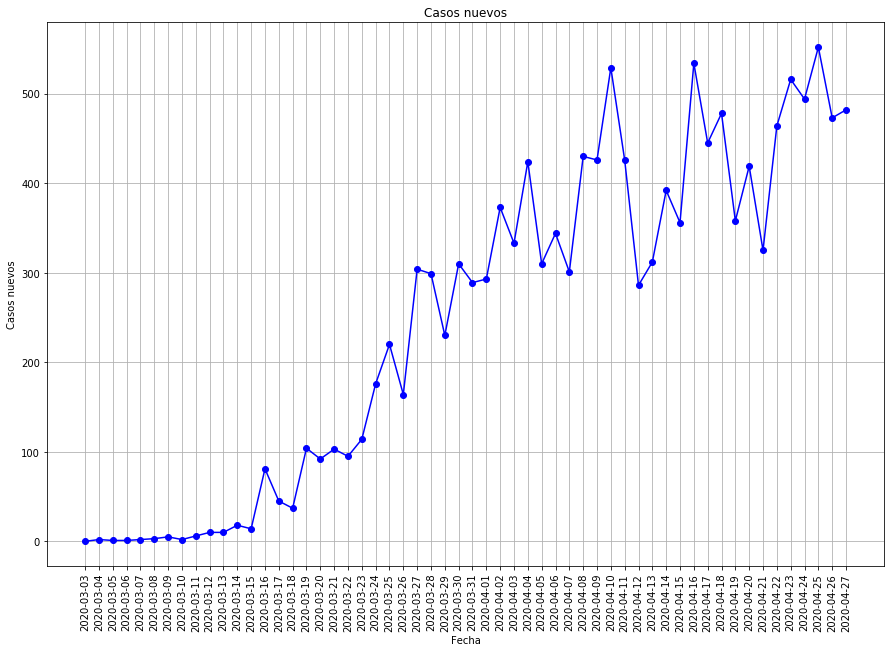

In [10]:
Graph("Casos nuevos")

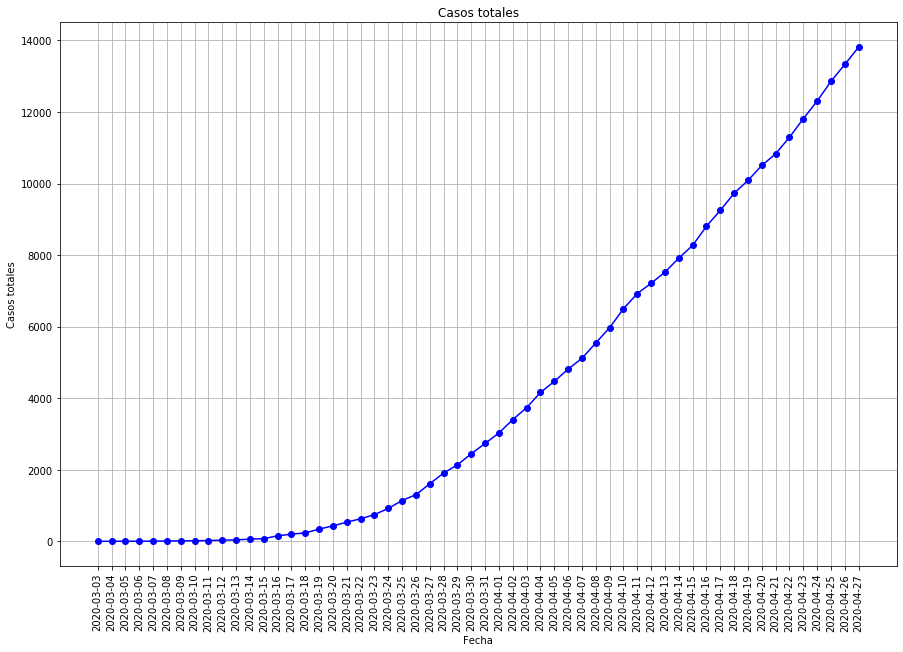

In [11]:
Graph("Casos totales")

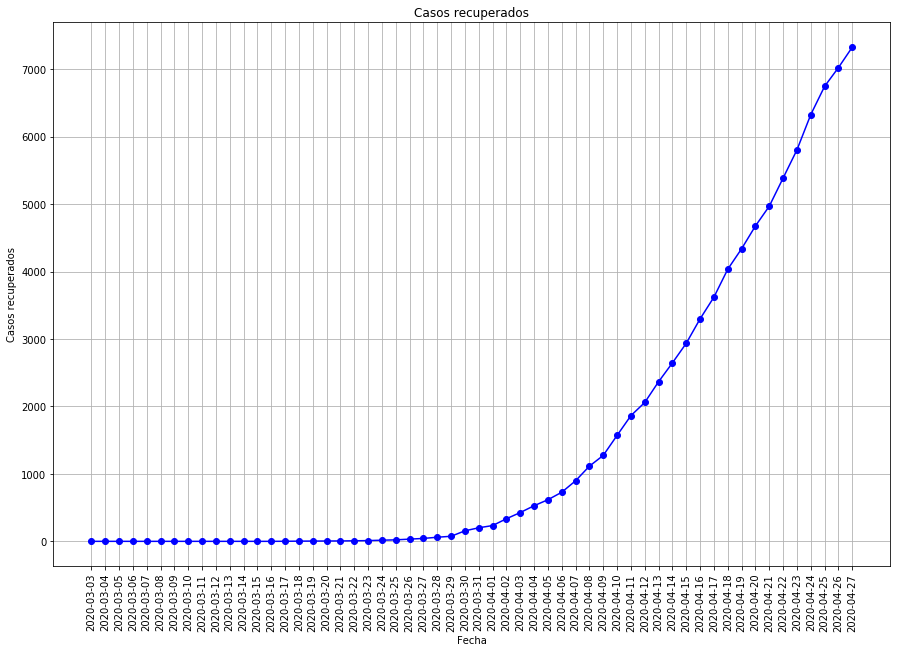

In [12]:
Graph("Casos recuperados")

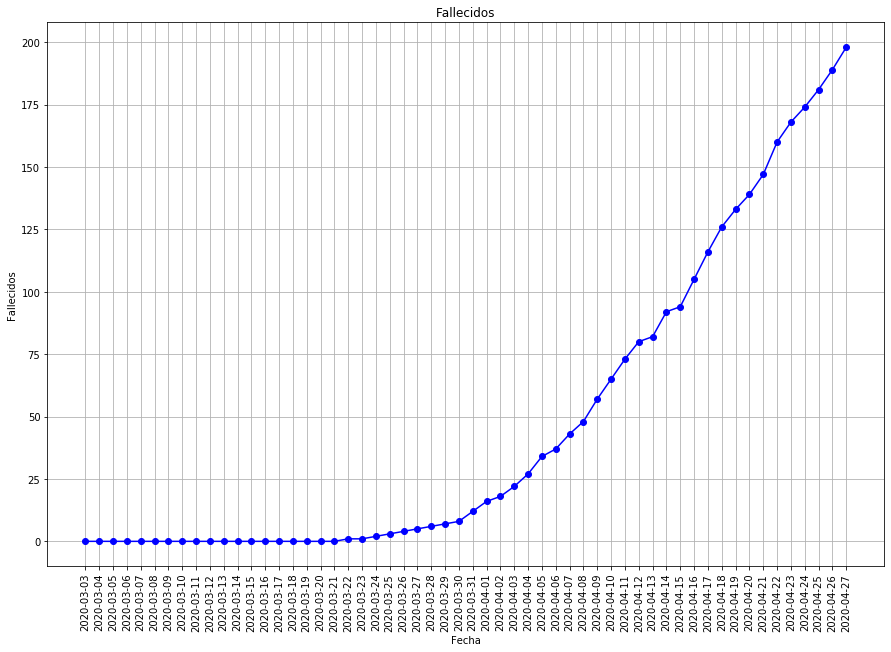

In [13]:
Graph("Fallecidos")

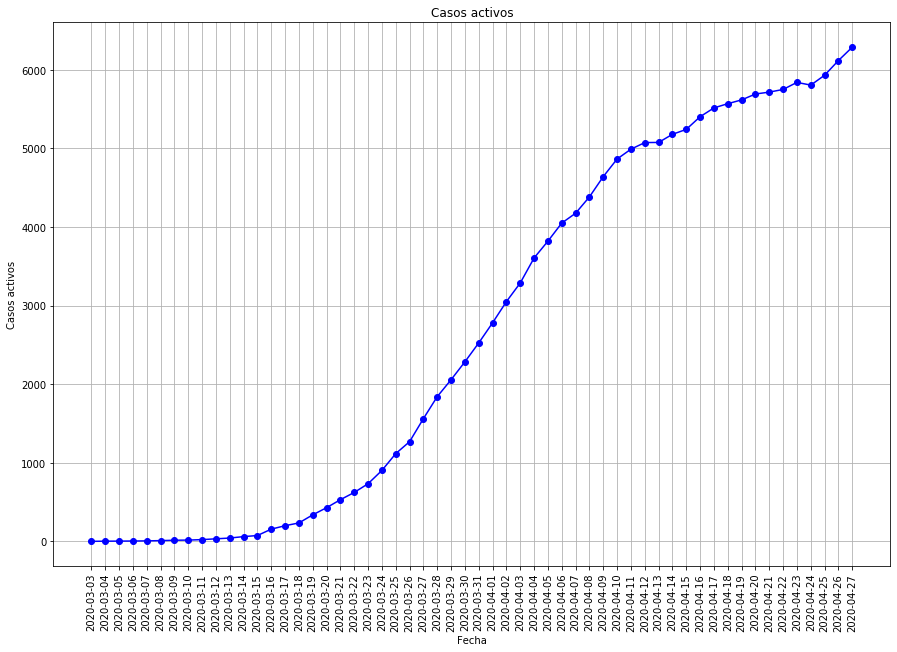

In [14]:
Graph("Casos activos")